# ArcheD performance

In [19]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.colors import ListedColormap

In [4]:
#!!!!!!!!!!!!! path to files !!!!!!!!!!!!!!!!!!
x = '20_10_22'


In [5]:
#Upload files from model training
#Model
hist=np.load(x+'/abeta_history_'+x+'.npy',allow_pickle='TRUE').item()
stat=np.load(x+'/abeta_stat_'+x+'.npy',allow_pickle='TRUE')
prediction_test = np.load(x+'/abeta_prediction_'+x+'.npy',allow_pickle='TRUE')
prediction_train = np.load(x+'/abeta_train_prediction_'+x+'.npy',allow_pickle='TRUE')
prediction_all = np.load(x+'/abeta_all_prediction_'+x+'.npy',allow_pickle='TRUE')
test_label = np.load(x+'/abeta_testlab_'+x+'.npy',allow_pickle='TRUE')

## attention with what metafile you upload
info = pd.read_csv(x+'/abeta_info_improved_'+x+'.csv')
dense = np.load(x+'/abeta_dense_out_'+x+'.npy',allow_pickle='TRUE')
dense_all = np.load(x+'/abeta_dense_all_out_'+x+'.npy',allow_pickle='TRUE')



In [6]:
#BEST Model
stat_best=np.load(x+'/abeta_stat_best_'+x+'.npy',allow_pickle='TRUE')
prediction_test_best = np.load(x+'/abeta_prediction_best_'+x+'.npy',allow_pickle='TRUE')
prediction_train_best = np.load(x+'/abeta_train_prediction_best_'+x+'.npy',allow_pickle='TRUE')
prediction_all_best = np.load(x+'/abeta_all_prediction_best_'+x+'.npy',allow_pickle='TRUE')
dense_best = np.load(x+'/abeta_dense_out_best_'+x+'.npy',allow_pickle='TRUE')
dense_all_best = np.load(x+'/abeta_dense_all_out_best_'+x+'.npy',allow_pickle='TRUE')


In [7]:
stat[2]**2

0.6725178323223101

In [8]:
stat_best[2]**2

0.6646936423446596

In [9]:
hist['val_loss']

[0.9034926295280457,
 0.2063860297203064,
 0.15910622477531433,
 0.17502473294734955,
 0.13335280120372772,
 0.13246940076351166,
 0.16599689424037933,
 0.12361481040716171,
 0.13889099657535553,
 0.13170093297958374,
 0.13778942823410034,
 0.12977942824363708,
 0.13153661787509918,
 0.129241481423378,
 0.12836560606956482,
 0.12592819333076477,
 0.126034215092659,
 0.12687534093856812,
 0.12658947706222534,
 0.12651196122169495,
 0.1264016479253769,
 0.1254587173461914,
 0.12651775777339935]

In [10]:
list(info.columns)

['Unnamed: 0.3',
 'Unnamed: 0.2',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'Image_id',
 'RID',
 'Subject.ID',
 'Project',
 'Phase',
 'Sex',
 'Weight',
 'Research.Group',
 'APOE.A1',
 'APOE.A2',
 'VISITCODE',
 'Visit',
 'Archive.Date',
 'Study.Date',
 'Age',
 'Modality',
 'pipeline',
 'Description',
 'pet_tracer',
 'csf_method',
 'ABETA',
 'TAU',
 'PTAU',
 'CLASS',
 'PATH']

In [11]:
prediction_all_best.shape[0]

1868

In [12]:
info.shape

(1870, 29)

In [13]:
info

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Image_id,RID,Subject.ID,Project,Phase,Sex,...,Modality,pipeline,Description,pet_tracer,csf_method,ABETA,TAU,PTAU,CLASS,PATH
0,0,9323,20504,25595,I1043793,6400,023_S_6400,ADNI,ADNI 3,F,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",PET Brain Amyvid (2) (AC) AV45,AV45,Elecsys,2156.000000,295.800000,25.130000,1.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_02...
1,1,18238,40521,50888,I308131,4692,070_S_4692,ADNI,ADNI 2,M,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",FORE-ITERATIVEAV-454X5MIN3DBASELINE AV45,AV45,Elecsys_predicted,301.536659,244.723273,31.779175,3.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_07...
2,2,5521,11852,14488,I403540,4263,014_S_4263,ADNI,ADNI 2,M,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",ADNI Brain PET: Raw AV45,AV45,Elecsys,613.300000,422.900000,41.420000,3.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_01...
3,3,3016,6631,8231,I1022851,6455,007_S_6455,ADNI,ADNI 3,F,...,PET,"FBB Coreg, Avg, Standardized Image and Voxel Size",AX:BRAIN:FBB:IR CTAC NF,FBB,Elecsys,1894.000000,248.500000,20.240000,0.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_00...
4,4,13976,31191,39292,I430472,4714,036_S_4714,ADNI,ADNI 2,F,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",ADNI-AV45 (AC),AV45,Elecsys,993.600000,416.800000,40.960000,1.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_03...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,1865,30124,66302,82710,I206414,2148,153_S_2148,ADNI,ADNI GO,F,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",AV-45 PET BRAIN 2 AV45,AV45,Elecsys,1331.000000,173.300000,15.920000,0.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_15...
1866,1866,10729,23638,29615,I392844,5277,027_S_5277,ADNI,ADNI 2,F,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",ADNI Brain PET: Raw AV45,AV45,Elecsys_predicted,580.481503,272.661858,41.439938,3.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_02...
1867,1867,8607,18475,22469,I207682,31,023_S_0031,ADNI,ADNI GO,F,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",PET Brain AV45,AV45,Elecsys,923.700000,345.800000,31.750000,3.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_02...
1868,1868,16648,36960,46412,I297099,4578,053_S_4578,ADNI,ADNI 2,F,...,PET,"AV45 Coreg, Avg, Standardized Image and Voxel ...",ADNI Brain PET: Raw AV45,AV45,Elecsys_predicted,1560.173956,140.308559,11.719647,0.0,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_05...


In [14]:
# model was trained on 1868 samples out of 1870 due to batch size, so we need to exclude leftovers
num = prediction_all_best.shape[0]

i = info.iloc[:num,:].copy()

In [15]:
i['prediction'] = prediction_all_best.flatten()
i['ABETA']= np.log(i['ABETA'])

In [16]:
i['ABETA']

0       7.676010
1       5.708892
2       6.418854
3       7.546446
4       6.901335
          ...   
1863    7.520235
1864    6.917706
1865    7.193686
1866    6.363858
1867    6.828387
Name: ABETA, Length: 1868, dtype: float64

In [17]:
#color palette
CB_color_cycle = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

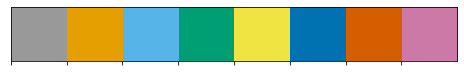

In [20]:
sns.palplot(sns.color_palette(CB_color_cycle))

In [23]:
my_colors = ListedColormap(sns.color_palette(CB_color_cycle))

# Model Performance 

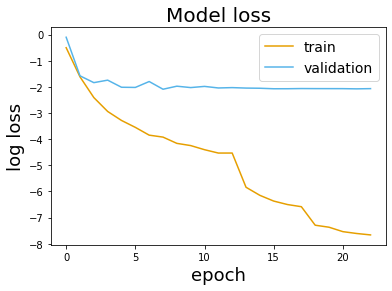

In [24]:
# log loss
plt.plot(np.log(hist['loss']), color = CB_color_cycle[1])
plt.plot(np.log(hist['val_loss']), color = CB_color_cycle[2])

plt.title('Model loss', size = 20)
plt.ylabel('log loss', size = 18)

plt.xlabel('epoch', size = 18)

plt.legend(['train', 'validation','best model'], loc='upper right', fontsize=14)

plt.savefig(x+'/abeta_cnn_loss_'+x+'.png')
plt.savefig(x+'/abeta_cnn_loss_'+x+'.svg', format="svg")


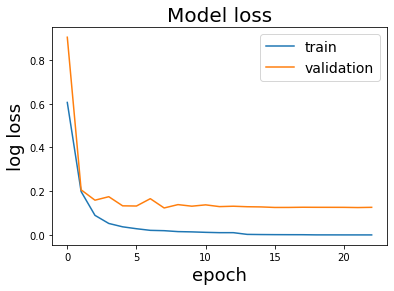

In [25]:
# original loss
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])

plt.title('Model loss', size = 20)
plt.ylabel('log loss', size = 18)

plt.xlabel('epoch', size = 18)

plt.legend(['train', 'validation','best model'], loc='upper right', fontsize=14)



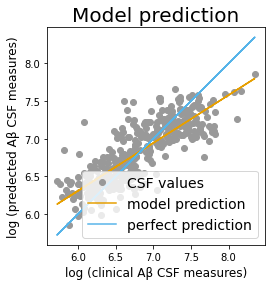

In [26]:
# model prediction
plt.plot(test_label,prediction_test_best,'o', color = CB_color_cycle[0])
plt.plot(test_label, stat_best[0]*test_label + stat_best[1], color = CB_color_cycle[1])
plt.plot(test_label,test_label , color = CB_color_cycle[2])
plt.axis('square')
plt.title('Model prediction', size = 20 )
plt.ylabel('log (predected Aβ CSF measures)',size = 12)
plt.xlabel('log (clinical Aβ CSF measures)', size = 12)
plt.legend(['CSF values','model prediction', 'perfect prediction'], loc='lower right', fontsize=14)
#plt.savefig(x+'/abeta_cnn_prediction_'+x+'.png')
plt.savefig(x+'/abeta_cnn_prediction_'+x+'.svg', format="svg")

In [27]:
#model prediction plot with both training and testing samples
i_train = i.iloc[:info.shape[0]-prediction_test_best.shape[0],:]
i_test = i.iloc[info.shape[0]-prediction_test_best.shape[0]:,:]

In [28]:
s_train = stats.linregress(i_train['ABETA'],i_train['prediction']) 

In [29]:
s_train

LinregressResult(slope=0.8354373885194482, intercept=1.122672247361046, rvalue=0.9396005506672014, pvalue=0.0, stderr=0.007873502777241923, intercept_stderr=0.05373725824620879)

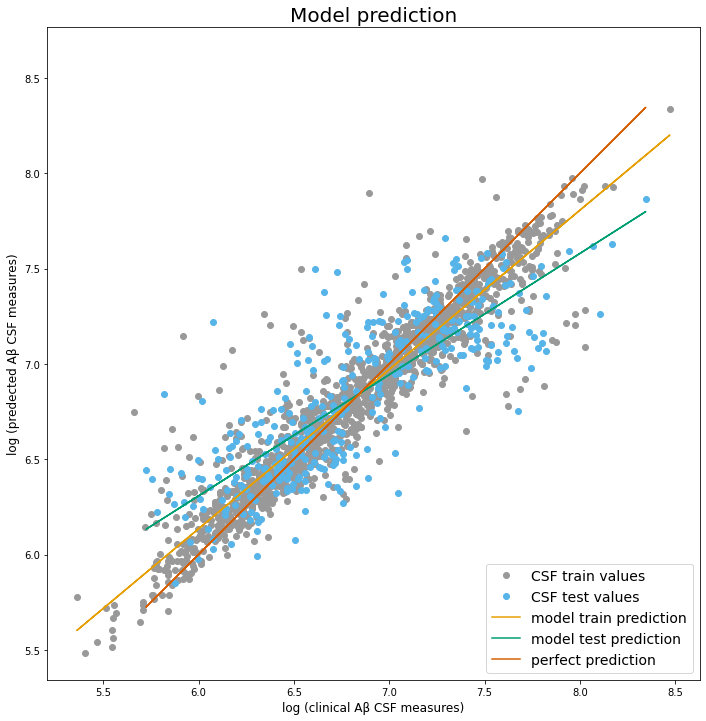

In [30]:
plt.figure(figsize=(12,12))
plt.plot(i_train['ABETA'],i_train['prediction'],'o', color = CB_color_cycle[0])
plt.plot(i_test['ABETA'],i_test['prediction'],'o', color = CB_color_cycle[2])
plt.plot(i_train['ABETA'], s_train[0]*i_train['ABETA'] + s_train[1], color = CB_color_cycle[1])
plt.plot(test_label, stat_best[0]*test_label + stat_best[1], color = CB_color_cycle[3])
plt.plot(test_label,test_label , color = CB_color_cycle[6])
plt.axis('square')

plt.title('Model prediction', size = 20 )
plt.ylabel('log (predected Aβ CSF measures)',size = 12)
plt.xlabel('log (clinical Aβ CSF measures)', size = 12)
plt.legend(['CSF train values', 'CSF test values','model train prediction',
            'model test prediction','perfect prediction'], loc='lower right', fontsize=14)

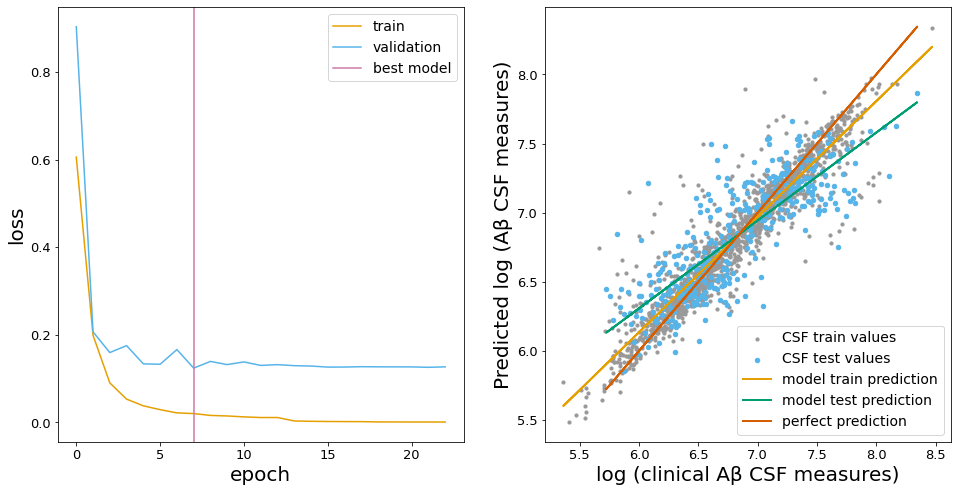

In [31]:
# plots together
fig, axs = plt.subplots(1,2, figsize=(16,8))

axs[0].plot(hist['loss'], color = CB_color_cycle[1])
axs[0].plot(hist['val_loss'], color = CB_color_cycle[2])
#axs[0].set_title('Model loss', size = 20)
axs[0].set_ylabel('loss', size = 20)
axs[0].set_xlabel('epoch', size = 20)
axs[0].axvline(x = 7, color = CB_color_cycle[7], label = 'axvline - full height')
axs[0].tick_params(axis='both', which='major', labelsize=13)
axs[0].legend(['train', 'validation','best model'], loc='upper right', fontsize=14)
#axs[0].axis('square')
#axs[0].set_ylim(0,1)

axs[1].scatter(i_train['ABETA'],i_train['prediction'], color = CB_color_cycle[0], s = 10)
axs[1].scatter(i_test['ABETA'],i_test['prediction'], color = CB_color_cycle[2], s = 20)
axs[1].plot(i_train['ABETA'], s_train[0]*i_train['ABETA'] + s_train[1], color = CB_color_cycle[1],linewidth=2)
axs[1].plot(test_label, stat_best[0]*test_label + stat_best[1], color = CB_color_cycle[3],linewidth=2)
axs[1].plot(test_label,test_label , color = CB_color_cycle[6],linewidth=2)
#axs[1].axis('square')
#axs[1].set_title('Model prediction', size = 20 )
axs[1].set_ylabel('Predicted log (Aβ CSF measures)',size = 20)
axs[1].set_xlabel('log (clinical Aβ CSF measures)', size = 20)
axs[1].tick_params(axis='both', which='major', labelsize=13)
axs[1].legend(['CSF train values', 'CSF test values','model train prediction',
            'model test prediction','perfect prediction'], loc='lower right', fontsize=14)

fig.savefig(x+'/manuscript_model_perform_'+x+'.png')
fig.savefig(x+'/manuscript_model_perform_'+x+'.svg', format="svg")

In [32]:
i.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'Image_id', 'RID', 'Subject.ID', 'Project', 'Phase', 'Sex', 'Weight',
       'Research.Group', 'APOE.A1', 'APOE.A2', 'VISITCODE', 'Visit',
       'Archive.Date', 'Study.Date', 'Age', 'Modality', 'pipeline',
       'Description', 'pet_tracer', 'csf_method', 'ABETA', 'TAU', 'PTAU',
       'CLASS', 'PATH', 'prediction'],
      dtype='object')

In [33]:
# model prediction by biological and clinical classes
i_cn = i[i['Research.Group']== 'CN'].copy()
i_smc = i[i['Research.Group']== 'SMC'].copy()
i_mci = i[i['Research.Group']== 'MCI'].copy()
i_ad = i[i['Research.Group']== 'AD'].copy()

i_0 = i[i['CLASS']== 0].copy()
i_1 = i[i['CLASS']== 1].copy()
i_2 = i[i['CLASS']== 2].copy()
i_3 = i[i['CLASS']== 3].copy()

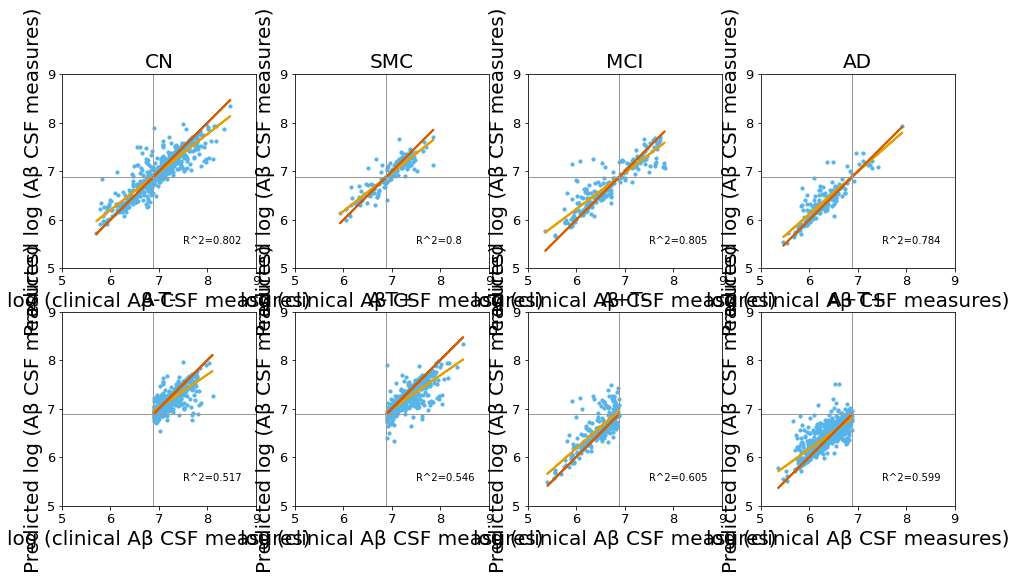

In [34]:
fig, axs = plt.subplots(2,4, figsize=(16,8))

def class_plot(x,y,i,j, title): # x- real CSF ; y - predicted CSF
    axs[i,j].scatter(x,y, color = CB_color_cycle[2], s = 10)
    s= stats.linregress(x,y) 
    
    axs[i,j].plot(x, s[0]*x + s[1], color = CB_color_cycle[1],linewidth=2)
    
    axs[i,j].plot(x,x , color = CB_color_cycle[6],linewidth=2)
    axs[i,j].axis('square')
    axs[i,j].set_title(title, size = 20 )
    axs[i,j].set_ylabel('Predicted log (Aβ CSF measures)',size = 20)
    axs[i,j].set_xlabel('log (clinical Aβ CSF measures)', size = 20)
    axs[i,j].set_ylim(5,9)
    axs[i,j].set_xlim(5,9)
    axs[i,j].tick_params(axis='both', which='major', labelsize=13)
    axs[i,j].axvline(x = np.log(980), color = CB_color_cycle[0], label = 'axvline - full height',linewidth=1)
    axs[i,j].axhline(y = np.log(980), color = CB_color_cycle[0], label = 'axhline - full height',linewidth=1)
    axs[i,j].text(7.5,5.5, s = 'R^2=%s'%round(s[2]**2,3))


class_plot(i_cn['ABETA'],i_cn['prediction'], 0,0,'CN')
class_plot(i_smc['ABETA'],i_smc['prediction'],0, 1,'SMC')
class_plot(i_mci['ABETA'],i_mci['prediction'],0, 2,'MCI')
class_plot(i_ad['ABETA'],i_ad['prediction'],0, 3,'AD')

class_plot(i_0['ABETA'],i_0['prediction'], 1,0,'A-T-')
class_plot(i_1['ABETA'],i_1['prediction'],1, 1,'A-T+')
class_plot(i_2['ABETA'],i_2['prediction'],1, 2,'A+T-')
class_plot(i_3['ABETA'],i_3['prediction'],1, 3,'A+T+')

fig.savefig(x+'/manuscript_model_perform_classes_'+x+'.png')
fig.savefig(x+'/manuscript_model_perform_classes_'+x+'.svg', format="svg")

# Model statistics 

In [35]:
s = stats.linregress(i['ABETA'],i['prediction']) 

In [36]:
print(stat)
print(stat_best)
print(s)

[6.92170593e-01 2.10312238e+00 8.20071846e-01 3.36407201e-92
 2.50428412e-02]
[6.35755815e-01 2.49330118e+00 8.15287460e-01 2.73309492e-90
 2.34114872e-02]
LinregressResult(slope=0.7978700701244799, intercept=1.3795537948402048, rvalue=0.9172693504195166, pvalue=0.0, stderr=0.008019628564470893, intercept_stderr=0.05477757643018973)


In [37]:
print(stat[2]) 
print(stat_best[2])
print(s[2])
print(stat[2]**2)
print(stat_best[2]**2)
print(s[2]**2)

0.8200718458295652
0.8152874599456682
0.9172693504195166
0.6725178323223101
0.6646936423446596
0.8413830612190419
